### 6-Analyte Classification on the preprocessed data using Logistic Regression
### Edgar Acuna
###  June 2021

In [1]:
import numpy as np
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1=pd.read_csv("c://onr2020/NRLset1_part1.csv",header=None)
df2=pd.read_csv("c://onr2020/NRLset1_part2.csv",header=None)
df3=pd.read_csv("c://onr2020/NRLset1_part3.csv",header=None)
df4=pd.read_csv("c://onr2020/NRLset1_part4.csv",header=None)
df5=pd.read_csv("c://onr2020/NRLset1_part5.csv",header=None)
df6=pd.read_csv("c://onr2020/NRLset1_part6.csv",header=None)
df7=pd.read_csv("c://onr2020/NRLset1_part7.csv",header=None)
df8=pd.read_csv("c://onr2020/NRLset1_part8.csv",header=None)
y=pd.read_csv("c://onr2020/labels.csv",header=None)
ys=pd.read_csv("c://onr2020/substrateIDs.csv",header=None)
subs=pd.read_csv("c://onr2020/substrates.csv",header=None)
dfset1=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],ignore_index=True)
print('Size of the dataframe: {}'.format(dfset1.shape))

Size of the dataframe: (18000, 1701)


In [37]:
print('Size of the dataframe: {}'.format(subs.shape))

Size of the dataframe: (9, 1701)


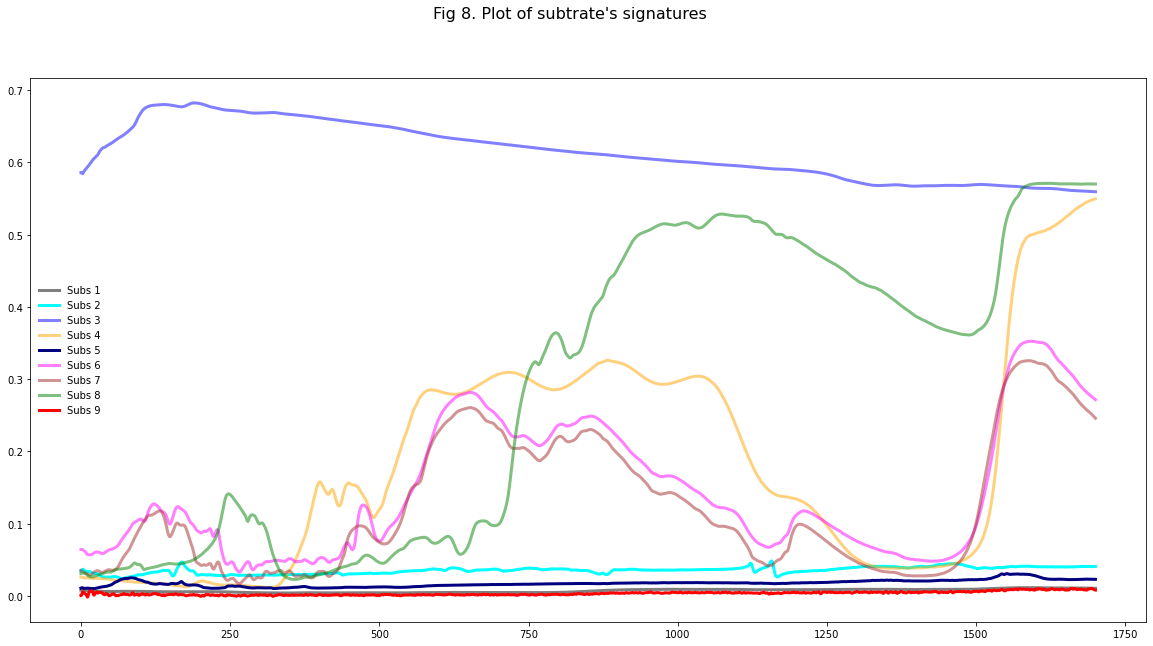

In [47]:
fig, ax = plt.subplots(figsize=(20,10))
x=np.arange(0,1701,1)
fig.suptitle("Fig 8. Plot of subtrate's signatures",fontsize=16)
ax.plot(x, subs.iloc[0,:], color='black',lw=3, alpha=0.5, label='Subs 1')
ax.plot(x,subs.iloc[1,:], color='cyan', lw=3, label='Subs 2')
ax.plot(x, subs.iloc[2,:], color='blue', lw=3, alpha=0.5, label='Subs 3')
ax.plot(x, subs.iloc[3,:], color='orange', lw=3, alpha=0.5, label='Subs 4')
ax.plot(x,subs.iloc[4,:], color='navy', lw=3, label='Subs 5')
ax.plot(x, subs.iloc[5,:], color='magenta',lw=3, alpha=0.5, label='Subs 6')
ax.plot(x, subs.iloc[6,:], color='brown', lw=3, alpha=0.5, label='Subs 7')
ax.plot(x, subs.iloc[7,:], color='green', lw=3, alpha=0.5, label='Subs 8')
ax.plot(x,subs.iloc[8,:], color='red', lw=3, label='Subs 9')
ax.legend(loc='best', frameon=False)

In [4]:
dfset2=dfset1.copy()
dfset2['Analyte']=y
dfset2['substrate']=ys
dfsub1=dfset2[dfset2['substrate']==1]
dfsub2=dfset2[dfset2['substrate']==2]
dfsub3=dfset2[dfset2['substrate']==3]
dfsub4=dfset2[dfset2['substrate']==4]
dfsub5=dfset2[dfset2['substrate']==5]
dfsub6=dfset2[dfset2['substrate']==6]
dfsub7=dfset2[dfset2['substrate']==7]
dfsub8=dfset2[dfset2['substrate']==8]
dfsub9=dfset2[dfset2['substrate']==9]

In [5]:
mdfsub1=dfsub1.iloc[:,0:1701]
mdfsub2=dfsub2.iloc[:,0:1701]
mdfsub3=dfsub3.iloc[:,0:1701]
mdfsub4=dfsub4.iloc[:,0:1701]
mdfsub5=dfsub5.iloc[:,0:1701]
mdfsub6=dfsub6.iloc[:,0:1701]
mdfsub7=dfsub7.iloc[:,0:1701]
mdfsub8=dfsub8.iloc[:,0:1701]
mdfsub9=dfsub9.iloc[:,0:1701]

In [6]:
y1=subs.loc[0,:]
y2=subs.loc[1,:]
y3=subs.loc[2,:]
y4=subs.loc[3,:]
y5=subs.loc[4,:]
y6=subs.loc[5,:]
y7=subs.loc[6,:]
y8=subs.loc[7,:]
y9=subs.loc[8,:]

###  Centering

In [7]:
modsub1=mdfsub1.apply(lambda x : x -(np.sum(np.array(x)*np.array(y1))/np.sum(np.array(y1)*np.array(y1)))*y1,axis=1)
modsub2=mdfsub2.apply(lambda x : x -(np.sum(np.array(x)*np.array(y2))/np.sum(np.array(y2)*np.array(y2)))*y2,axis=1)
modsub3=mdfsub3.apply(lambda x : x -(np.sum(np.array(x)*np.array(y3))/np.sum(np.array(y3)*np.array(y3)))*y3,axis=1)
modsub4=mdfsub4.apply(lambda x : x -(np.sum(np.array(x)*np.array(y4))/np.sum(np.array(y4)*np.array(y4)))*y4,axis=1)
modsub5=mdfsub5.apply(lambda x : x -(np.sum(np.array(x)*np.array(y5))/np.sum(np.array(y5)*np.array(y5)))*y5,axis=1)
modsub6=mdfsub6.apply(lambda x : x -(np.sum(np.array(x)*np.array(y6))/np.sum(np.array(y6)*np.array(y6)))*y6,axis=1)
modsub7=mdfsub7.apply(lambda x : x -(np.sum(np.array(x)*np.array(y7))/np.sum(np.array(y7)*np.array(y7)))*y7,axis=1)
modsub8=mdfsub8.apply(lambda x : x -(np.sum(np.array(x)*np.array(y8))/np.sum(np.array(y8)*np.array(y8)))*y8,axis=1)
modsub9=mdfsub9.apply(lambda x : x -(np.sum(np.array(x)*np.array(y9))/np.sum(np.array(y9)*np.array(y9)))*y9,axis=1)

In [8]:
subdf=[modsub1,modsub2,modsub3,modsub4,modsub5,modsub6,modsub7,modsub8,modsub9]
cent_subs=pd.concat(subdf)
cent_subs.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
4,0.002296,0.002603,0.002368,0.003507,0.003637,0.003537,0.004850,0.005059,0.004744,0.006244,...,-0.001858,-0.002531,-0.002143,-0.004422,-0.003123,-0.000884,-0.001225,-0.001406,-0.002792,-0.002432
5,-0.005471,0.003865,0.000351,-0.000060,-0.000258,-0.000582,0.002557,0.003072,0.000961,0.003941,...,-0.004245,-0.001915,-0.005149,-0.001717,-0.003814,-0.003100,-0.000355,-0.000540,-0.005481,-0.000857
8,-0.002496,0.016867,0.014204,0.005327,0.003649,0.006143,-0.015160,0.004201,0.003791,0.004599,...,0.002574,-0.018040,-0.018488,-0.006529,0.009548,0.004694,0.000399,0.018158,0.016369,0.007582
28,0.001313,0.001443,0.001536,0.001612,0.001687,0.001768,0.001866,0.001979,0.002079,0.002155,...,-0.004576,-0.004550,-0.004524,-0.004502,-0.004476,-0.004446,-0.004411,-0.004373,-0.004332,-0.004301
46,-0.001097,0.000040,0.001125,0.002056,0.001685,0.002006,0.000228,0.001179,0.001835,0.002005,...,-0.004655,-0.006438,-0.005102,-0.005563,-0.004804,-0.005517,-0.004411,-0.005738,-0.005031,-0.005584


In [9]:
cent_subs['substrate']=ys

### Normalization

In [10]:
b=cent_subs.iloc[:,0:1701]
b.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
4,0.002296,0.002603,0.002368,0.003507,0.003637,0.003537,0.004850,0.005059,0.004744,0.006244,...,-0.001858,-0.002531,-0.002143,-0.004422,-0.003123,-0.000884,-0.001225,-0.001406,-0.002792,-0.002432
5,-0.005471,0.003865,0.000351,-0.000060,-0.000258,-0.000582,0.002557,0.003072,0.000961,0.003941,...,-0.004245,-0.001915,-0.005149,-0.001717,-0.003814,-0.003100,-0.000355,-0.000540,-0.005481,-0.000857
8,-0.002496,0.016867,0.014204,0.005327,0.003649,0.006143,-0.015160,0.004201,0.003791,0.004599,...,0.002574,-0.018040,-0.018488,-0.006529,0.009548,0.004694,0.000399,0.018158,0.016369,0.007582
28,0.001313,0.001443,0.001536,0.001612,0.001687,0.001768,0.001866,0.001979,0.002079,0.002155,...,-0.004576,-0.004550,-0.004524,-0.004502,-0.004476,-0.004446,-0.004411,-0.004373,-0.004332,-0.004301
46,-0.001097,0.000040,0.001125,0.002056,0.001685,0.002006,0.000228,0.001179,0.001835,0.002005,...,-0.004655,-0.006438,-0.005102,-0.005563,-0.004804,-0.005517,-0.004411,-0.005738,-0.005031,-0.005584


In [11]:
#normalize(b)
b1=b.apply(lambda x: x/(x**2).sum()**.5, axis=1)
b1.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
4,0.006593,0.007476,0.006800,0.010072,0.010446,0.010157,0.013928,0.014528,0.013623,0.017932,...,-0.005337,-0.007268,-0.006155,-0.012700,-0.008968,-0.002538,-0.003519,-0.004037,-0.008019,-0.006984
5,-0.016333,0.011538,0.001048,-0.000179,-0.000770,-0.001737,0.007633,0.009170,0.002870,0.011766,...,-0.012672,-0.005718,-0.015373,-0.005127,-0.011386,-0.009255,-0.001060,-0.001612,-0.016363,-0.002559
8,-0.005348,0.036134,0.030431,0.011412,0.007818,0.013162,-0.032478,0.008999,0.008123,0.009853,...,0.005515,-0.038647,-0.039608,-0.013988,0.020456,0.010057,0.000856,0.038902,0.035069,0.016243
28,0.004714,0.005182,0.005515,0.005790,0.006058,0.006349,0.006700,0.007108,0.007465,0.007738,...,-0.016436,-0.016340,-0.016247,-0.016168,-0.016075,-0.015967,-0.015840,-0.015707,-0.015558,-0.015445
46,-0.003245,0.000118,0.003326,0.006083,0.004984,0.005934,0.000673,0.003487,0.005428,0.005932,...,-0.013769,-0.019043,-0.015090,-0.016453,-0.014209,-0.016319,-0.013047,-0.016972,-0.014881,-0.016518


In [12]:
a1=np.array(dfsub1['Analyte'].values.tolist())
a2=np.array(dfsub2['Analyte'].values.tolist())
a3=np.array(dfsub3['Analyte'].values.tolist())
a4=np.array(dfsub4['Analyte'].values.tolist())
a5=np.array(dfsub5['Analyte'].values.tolist())
a6=np.array(dfsub6['Analyte'].values.tolist())
a7=np.array(dfsub7['Analyte'].values.tolist())
a8=np.array(dfsub8['Analyte'].values.tolist())
a9=np.array(dfsub9['Analyte'].values.tolist())
y=np.concatenate((a1,a2,a3,a4,a5,a6,a7,a8,a9),axis=None)
#print(y)

In [13]:
X=b1.iloc[:,0:1701]
#model.fit(X,y)
#model.score(X,y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
# Applying again the k-nn classifier with k=3
#neigh = KNeighborsClassifier(n_neighbors=kVals[i])
start_time = time.time()
model = LogisticRegression(solver="newton-cg",multi_class="multinomial",max_iter=5000)
model.fit(X_train,y_train)
#Calculating  metrics of prediction
predictions = model.predict(X_test)
#print(predictions)
print("F1-score is=",f1_score(y_test,predictions, average="weighted"))
print("precision=",precision_score(y_test,predictions,average="weighted"))
print("The accuracy is=",model.score(X_test,y_test))
print("--- %s seconds ---" % (time.time() - start_time))

F1-score is= 0.9644474842044973
precision= 0.9674291002737527
The accuracy is= 0.9636111111111111
--- 7.885029077529907 seconds ---


In [14]:
#Calculating metrics for each class
print("EVALUATION ON TESTING DATA")
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        84
           2       1.00      0.97      0.99       107
           3       1.00      0.97      0.98        96
           4       0.95      0.89      0.92        90
           5       0.98      0.97      0.98       103
           6       1.00      0.99      0.99        80
           7       0.99      0.96      0.98        85
           8       1.00      0.97      0.98        90
           9       1.00      0.96      0.98        79
          10       1.00      0.98      0.99        81
          11       1.00      0.97      0.98        99
          12       0.89      0.99      0.94        89
          13       0.92      0.93      0.92        83
          14       0.97      0.96      0.96        95
          15       0.97      0.97      0.97        97
          16       0.96      0.88      0.92        82
          17       0.97      0.95      0.96        95


In [15]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
# Binarize the output
y1=label_binarize(y,classes=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,\
                            29,30,31,32,33,34,35,36,37,38,39,40])
n_classes = y1.shape[1]

In [16]:
# Learn to predict each class against the other
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=.2, random_state=0)
start_time = time.time()
classifier = OneVsRestClassifier(LogisticRegression(solver="newton-cg",class_weight="balanced",max_iter=10000))   
y_score = classifier.fit(X_train, y_train).predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 110.79537153244019 seconds ---


In [17]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

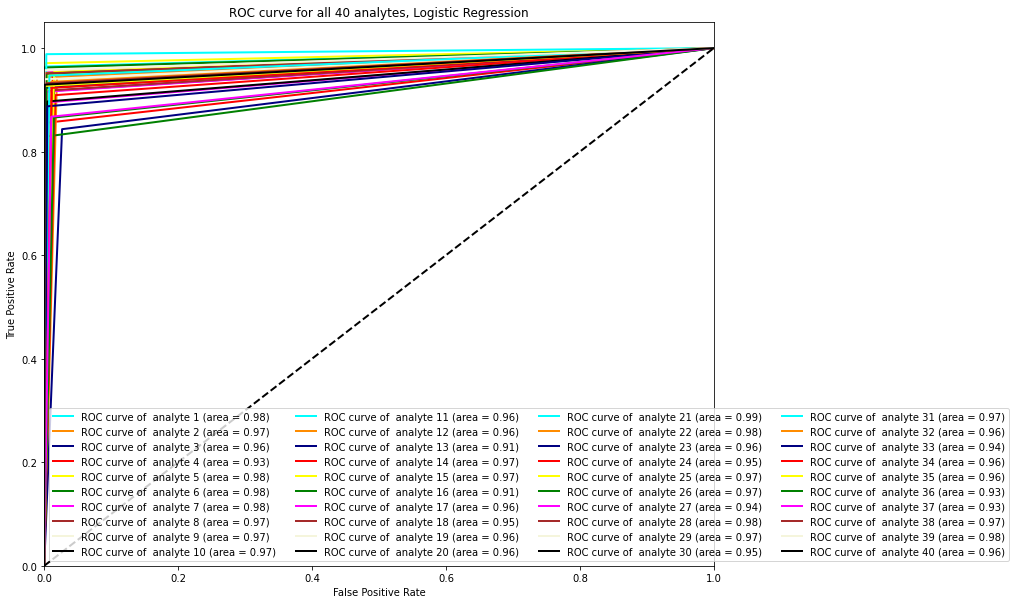

In [18]:
# First aggregate all false positive rates
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import cycle
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Plot all ROC curves
plt.figure(figsize=[12,10])
lw=2
colors = cycle(['cyan', 'darkorange', 'navy','red','yellow','green','magenta','brown','beige','black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of  analyte {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for all 40 analytes, Logistic Regression')
plt.legend(loc="best",ncol=4)
plt.show()

### Computing other metrics for binary classfication

In [19]:
#All the 40 analyzed are classified using a binary imbalanced  classification
labels=list(range(1,41))
start_time = time.time()
for j in labels:
    yclass=y.copy()
    yclass[yclass!=j]=0
    yclass[yclass==j]=1
    X_train, X_test, yclass_train, yclass_test = train_test_split(X,yclass,test_size=0.2,random_state=0)
    model = LogisticRegression(solver="newton-cg",class_weight="balanced",max_iter=10000)
    model.fit(X_train, yclass_train) 
    predictions = model.predict(X_test)
    print("Metrics for predicting analyte %d : accuracy=%.3f, F1-score=%.3f, Precision=%.3f" %(j, model.score(X_test,yclass_test), f1_score(yclass_test,predictions),precision_score(yclass_test,predictions)))
print("--- %s seconds ---" % (time.time() - start_time))

Metrics for predicting analyte 1 : accuracy=0.999, F1-score=0.982, Precision=1.000
Metrics for predicting analyte 2 : accuracy=0.998, F1-score=0.971, Precision=1.000
Metrics for predicting analyte 3 : accuracy=0.995, F1-score=0.903, Precision=0.889
Metrics for predicting analyte 4 : accuracy=0.994, F1-score=0.885, Precision=0.917
Metrics for predicting analyte 5 : accuracy=0.997, F1-score=0.948, Precision=0.926
Metrics for predicting analyte 6 : accuracy=0.999, F1-score=0.975, Precision=0.987
Metrics for predicting analyte 7 : accuracy=0.999, F1-score=0.976, Precision=1.000
Metrics for predicting analyte 8 : accuracy=0.998, F1-score=0.966, Precision=1.000
Metrics for predicting analyte 9 : accuracy=0.997, F1-score=0.925, Precision=0.914
Metrics for predicting analyte 10 : accuracy=0.997, F1-score=0.933, Precision=0.917
Metrics for predicting analyte 11 : accuracy=0.997, F1-score=0.944, Precision=0.958
Metrics for predicting analyte 12 : accuracy=0.980, F1-score=0.700, Precision=0.556
M

### Analytes  12, 13, 18, 20, 24, 25 and 37 

###  Performing PCA before classification

In [20]:
dfset3=b1.copy()
pca = PCA(n_components=30)
pca_result = pca.fit_transform(dfset3)

In [21]:
model = LogisticRegression(solver="newton-cg",multi_class="multinomial",max_iter=5000)
model.fit(pca_result,y)
print("Accuracy estimated by resubstitution", model.score(pca_result, y))

Accuracy estimated by resubstitution 0.9627222222222223


In [22]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(pca_result,y, test_size=0.2,random_state=0)

In [23]:
start_time = time.time()
model = LogisticRegression(solver="newton-cg",multi_class="multinomial",max_iter=5000)
model.fit(Xc_train,yc_train)
predictions = model.predict(Xc_test)
print("F1-score is=",f1_score(yc_test,predictions, average="weighted"))
print("precision=",precision_score(yc_test,predictions,average="weighted"))
print("The accuracy is=",model.score(Xc_test,yc_test))
print("--- %s seconds ---" % (time.time() - start_time))

F1-score is= 0.9530467314875801
precision= 0.956465002462562
The accuracy is= 0.9525
--- 2.200469732284546 seconds ---


In [24]:
#All the 40 analyzed are classified using a binary imbalanced  classification
labels=list(range(1,41))
start_time = time.time()
for j in labels:
    yclass=y.copy()
    yclass[yclass!=j]=0
    yclass[yclass==j]=1
    X_train, X_test, yclass_train, yclass_test = train_test_split(pca_result,yclass,test_size=0.2,random_state=0)
    model = LogisticRegression(solver="newton-cg",class_weight="balanced",max_iter=10000)
    model.fit(X_train, yclass_train) 
    predictions = model.predict(X_test)
    print("Metrics for predicting analyte %d : accuracy=%.3f, F1-score=%.3f, Precision=%.3f" %(j, model.score(X_test,yclass_test), f1_score(yclass_test,predictions),precision_score(yclass_test,predictions)))
print("--- %s seconds ---" % (time.time() - start_time))

Metrics for predicting analyte 1 : accuracy=0.997, F1-score=0.943, Precision=0.911
Metrics for predicting analyte 2 : accuracy=0.988, F1-score=0.831, Precision=0.730
Metrics for predicting analyte 3 : accuracy=0.984, F1-score=0.769, Precision=0.637
Metrics for predicting analyte 4 : accuracy=0.977, F1-score=0.661, Precision=0.519
Metrics for predicting analyte 5 : accuracy=0.988, F1-score=0.821, Precision=0.706
Metrics for predicting analyte 6 : accuracy=0.995, F1-score=0.902, Precision=0.839
Metrics for predicting analyte 7 : accuracy=0.999, F1-score=0.983, Precision=0.966
Metrics for predicting analyte 8 : accuracy=0.991, F1-score=0.842, Precision=0.759
Metrics for predicting analyte 9 : accuracy=0.987, F1-score=0.764, Precision=0.633
Metrics for predicting analyte 10 : accuracy=0.994, F1-score=0.878, Precision=0.798
Metrics for predicting analyte 11 : accuracy=0.995, F1-score=0.919, Precision=0.873
Metrics for predicting analyte 12 : accuracy=0.946, F1-score=0.474, Precision=0.312
M